In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Question 1

In [19]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target

In [27]:
from sklearn import svm

clf = svm.SVC(kernel="linear")
clf.fit(X, y)

SVC(kernel='linear')

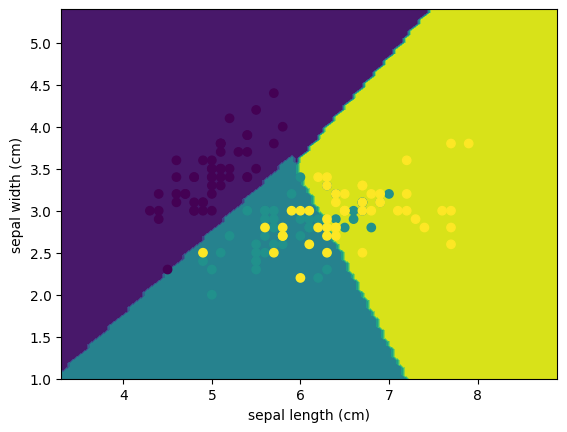

In [30]:
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    estimator=clf,
    X=X,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1]
)

plt.scatter(X[:, 0], X[:, 1], c=y)

### Question 2 and 3

In [35]:
path = "data/data12_1.csv"
df = pd.read_csv(path)

In [75]:
X = [[1, 0], [4, -1], [4, 1]] # identify support vectors
X = np.array([vector + [1] for vector in X]) # append 1 to each vector

y = [1, -1, -1] # corresponding target classes

A = X @ X.T 
alpha = np.linalg.solve(A, y)

W = sum(alpha[i] * X[i] for i in range(len(X)))

(-3.0, 3.0)

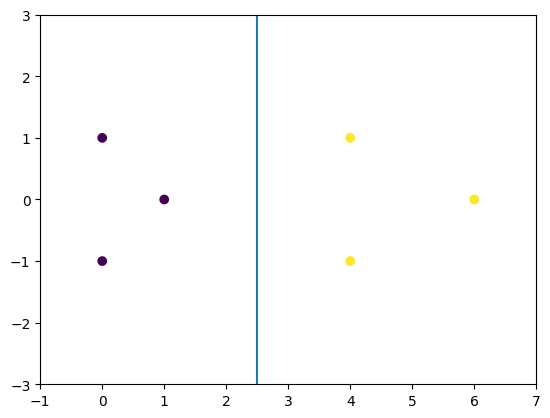

In [85]:
plt.scatter(df['x1'], df['x2'], c=df['class'])
plt.axline((-W[2] / W[0], 0), (0, -W[2] / W[1]))

plt.xlim((-1, 7))
plt.ylim(-3, 3)

### Question 4

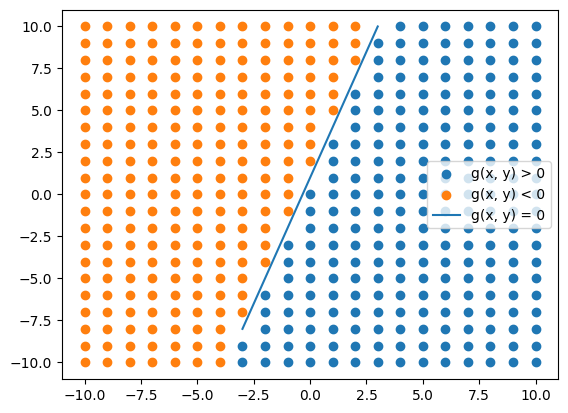

In [101]:
x = np.arange(-10, 11, 1)
y = np.arange(-10, 11, 1)

xv, yv = np.meshgrid(x, y)
Z = 1 + 3 * xv - yv

plt.scatter(xv[Z > 0], yv[Z > 0], label='g(x, y) > 0')
plt.scatter(xv[Z < 0], yv[Z < 0], label='g(x, y) < 0')
plt.plot(xv[Z == 0], yv[Z == 0], label='g(x, y) = 0')
plt.legend()

### Question 5

$ H_1: 5 + 2x_1 + 5x_2 = 0 $

$ H_2: 5 + 20x_1 + 50x_2 = 0 $
$ \implies H_2: 0.5 + 2x_1 + 5x_2 = 0$


Combining the two,
$H_0: 5.5 + 4x_1 + 10x_2 = 0$


(-10.0, 10.0)

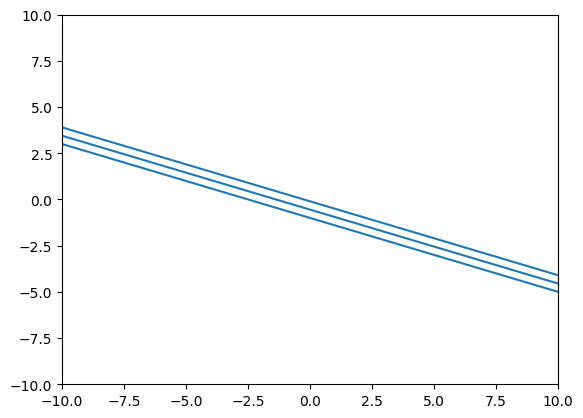

In [108]:
H1 = [5, 2, 5]
H2 = [0.5, 2, 5]
H0 = [5.5, 4, 10]

planes = [H0, H1, H2]
for i, H in enumerate(planes):
    x_intercept = -H[0] / H[1]
    y_intercept = -H[0] / H[2]
    plt.axline((x_intercept, 0), (0, y_intercept), label=f"H{i}")

plt.xlim((-10, 10))
plt.ylim((-10, 10))